In [61]:
# Analisis del precio de la vivienda en Málaga

# 1. Tomamos los datos mensuales de precio de compra y precio de alquiler, ambos por m2.
# Para ello utilizaremos web scraping sobre el portal de idealista.
    # https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/alquiler/andalucia/malaga-provincia/
    # https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/andalucia/malaga-provincia/

# 2. Tomamos datos sobre la construcción de nuevas viviendas por año, haciendo scraping de los pdf anuales
# del colegio de arquitectos de Málaga https://coamalaga.es/estadisticas/

In [62]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
precio_vivienda = pd.read_csv("assets/precio_vivienda.csv")
precio_alquiler = pd.read_csv("assets/precio_alquiler.csv")

print(precio_vivienda.head())
print(precio_alquiler.head())


            Mes   Precio_m2
0    Junio 2024  3.282 €/m2
1     Mayo 2024  3.226 €/m2
2    Abril 2024  3.179 €/m2
3    Marzo 2024  3.143 €/m2
4  Febrero 2024  3.113 €/m2
            Mes  Precio_m2
0    Junio 2024  15.1 €/m2
1     Mayo 2024  14.8 €/m2
2    Abril 2024  14.6 €/m2
3    Marzo 2024  14.1 €/m2
4  Febrero 2024  14.0 €/m2


In [63]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Diccionario para convertir meses en español a números de meses
meses_esp = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

# Función para convertir el formato de mes en español a fecha
def convertir_mes_a_fecha(mes_str):
    mes_str = mes_str.split()  # Dividir la cadena en mes y año
    mes = meses_esp[mes_str[0]]  # Obtener el número del mes
    año = int(mes_str[1])  # Obtener el año
    return pd.to_datetime(f'{año}-{mes:02d}-01')  # Crear una fecha en el formato yyyy-mm-dd

# Aplicar la conversión al DataFrame
precio_vivienda['Mes'] = precio_vivienda['Mes'].apply(convertir_mes_a_fecha)
precio_alquiler['Mes'] = precio_alquiler['Mes'].apply(convertir_mes_a_fecha)

print(precio_vivienda.head())
print(precio_alquiler.head())

         Mes   Precio_m2
0 2024-06-01  3.282 €/m2
1 2024-05-01  3.226 €/m2
2 2024-04-01  3.179 €/m2
3 2024-03-01  3.143 €/m2
4 2024-02-01  3.113 €/m2
         Mes  Precio_m2
0 2024-06-01  15.1 €/m2
1 2024-05-01  14.8 €/m2
2 2024-04-01  14.6 €/m2
3 2024-03-01  14.1 €/m2
4 2024-02-01  14.0 €/m2


In [64]:
# Creamos una columna para el año
precio_vivienda['Año'] = precio_vivienda['Mes'].dt.year
precio_alquiler['Año'] = precio_alquiler['Mes'].dt.year

# Limpiamos y formateamos el precio
precio_vivienda['Precio_m2'] = precio_vivienda['Precio_m2'].str.replace(' €/m2', '').str.replace('.', '').astype(float) 
precio_alquiler['Precio_m2'] = precio_alquiler['Precio_m2'].str.replace(' €/m2', '').str.replace('.', '').astype(float) 

print(precio_vivienda.head())
print(precio_alquiler.head())

         Mes  Precio_m2   Año
0 2024-06-01     3282.0  2024
1 2024-05-01     3226.0  2024
2 2024-04-01     3179.0  2024
3 2024-03-01     3143.0  2024
4 2024-02-01     3113.0  2024
         Mes  Precio_m2   Año
0 2024-06-01      151.0  2024
1 2024-05-01      148.0  2024
2 2024-04-01      146.0  2024
3 2024-03-01      141.0  2024
4 2024-02-01      140.0  2024


In [65]:
# Agrupar por año y calcular media
mean_precio_vivienda = precio_vivienda.groupby('Año').agg({
    'Precio_m2': 'mean',
})
print(mean_precio_vivienda.head())

mean_precio_alquiler = precio_alquiler.groupby('Año').agg({
    'Precio_m2': 'mean',
})
print(mean_precio_alquiler.head())

        Precio_m2
Año              
2006  3374.333333
2007  3222.583333
2008  3114.500000
2009  2998.500000
2010  2876.916667
      Precio_m2
Año            
2006  66.000000
2007  66.000000
2008  66.000000
2009  66.000000
2010  66.833333


In [66]:
# Nueva vivienda terminada
nueva_vivienda = pd.read_csv("assets/vivienda_terminada.csv")


# Remover separadores de miles y convertir a float
nueva_vivienda["N_viviendas_unifamiliares"] = nueva_vivienda["N_viviendas_unifamiliares"].str.replace('.', '', regex=False)
nueva_vivienda["N_viviendas_unifamiliares"] = nueva_vivienda["N_viviendas_unifamiliares"].str.replace(',', '.', regex=False).astype(float)

nueva_vivienda["N_viviendas_plurifamiliares"] = nueva_vivienda["N_viviendas_plurifamiliares"].str.replace('.', '', regex=False)
nueva_vivienda["N_viviendas_plurifamiliares"] = nueva_vivienda["N_viviendas_plurifamiliares"].str.replace(',', '.', regex=False).astype(float)

# sumamos todas para obtener el total
nueva_vivienda["Total"] = nueva_vivienda["N_viviendas_unifamiliares"] + nueva_vivienda["N_viviendas_plurifamiliares"] +  nueva_vivienda["N_viviendas_VPO_unifamiliares"] + nueva_vivienda["N_viviendas_VPO_plurifamiliares"]
nueva_vivienda

,Año,N_viviendas_unifamiliares,N_viviendas_plurifamiliares,N_viviendas_VPO_unifamiliares,N_viviendas_VPO_plurifamiliares,Total
0,2023,1357.0,3482.0,0,15,4854.0
1,2022,924.0,3063.0,0,116,4103.0
2,2021,1035.0,6297.0,0,220,7552.0
3,2020,1206.0,3711.0,6,116,5039.0
4,2019,1219.0,3288.0,0,0,4507.0
5,2018,875.0,2506.0,2,153,3536.0
6,2017,763.0,1738.0,3,79,2583.0
7,2016,507.0,711.0,0,17,1235.0
8,2015,475.0,644.0,10,5,1134.0
9,2014,502.0,761.0,22,31,1316.0


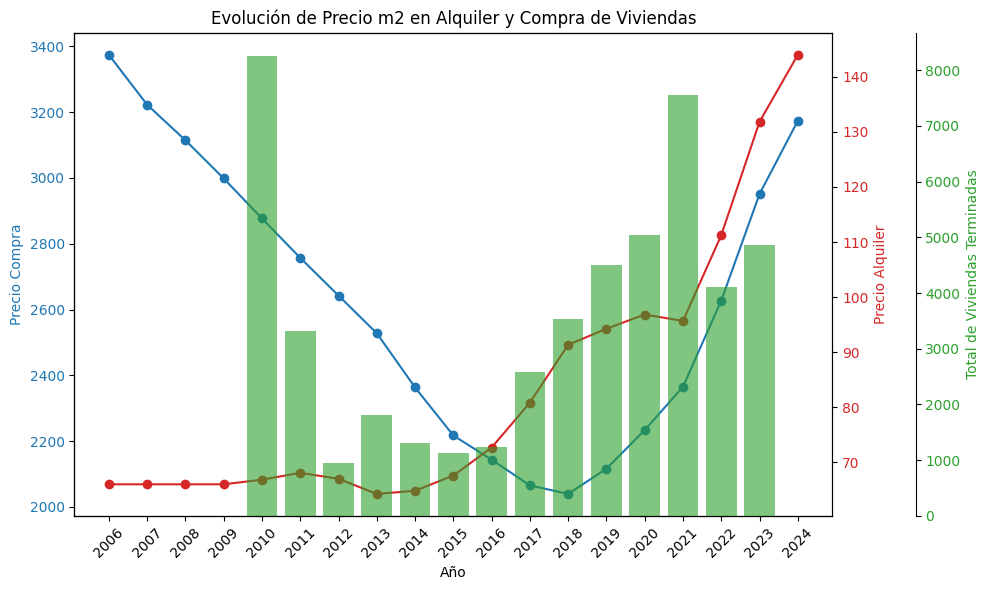

In [68]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar el primer DataFrame en el primer eje y
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Precio Compra', color=color)
ax1.plot(mean_precio_vivienda.index, mean_precio_vivienda['Precio_m2'], marker='o', color=color, label='Precio Compra')
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje y que comparte el mismo eje x
ax2 = ax1.twinx()  # Instanciar un segundo eje y que comparte el mismo eje x
color = 'tab:red'
ax2.set_ylabel('Precio Alquiler', color=color)
ax2.plot(mean_precio_alquiler.index, mean_precio_alquiler['Precio_m2'], marker='o', color=color, label='Precio Alquiler')
ax2.tick_params(axis='y', labelcolor=color)

# Crear un tercer eje y para el gráfico de barras
ax3 = ax1.twinx()  # Instanciar un tercer eje y que comparte el mismo eje x
ax3.spines['right'].set_position(('outward', 60))  # Mover el tercer eje más a la derecha
color = 'tab:green'
ax3.set_ylabel('Total de Viviendas Terminadas', color=color)
ax3.bar(nueva_vivienda['Año'], nueva_vivienda['Total'], color=color, alpha=0.6, label='Total Viviendas Terminadas')
ax3.tick_params(axis='y', labelcolor=color)

# Añadir título y etiquetas
plt.title('Evolución de Precio m2 en Alquiler y Compra de Viviendas')
ax1.set_xticks(mean_precio_vivienda.index)  # Asegurarse de que todos los años estén en el eje X
ax1.set_xticklabels(mean_precio_vivienda.index, rotation=45)  # Etiquetar los años y rotar las etiquetas si es necesario

# Añadir leyenda
fig.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()
